In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import datetime

In [71]:
def parser(x):
    return datetime.strptime(x,'%d-%m-%Y')

In [72]:
df=pd.read_csv('prepared_individual_data/Urti.csv',index_col=0,parse_dates=[0],date_parser=parser)

In [73]:
df.head()

,Urti
Date,
2018-06-01,0
2018-06-02,0
2018-06-03,0
2018-06-04,0
2018-06-05,0


In [74]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

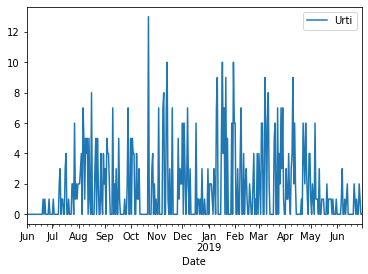

In [75]:
df.plot()

In [76]:
df_urti_weeklyS = df.resample('W').sum()
df_urti_weeklyM = df.resample('W').mean()

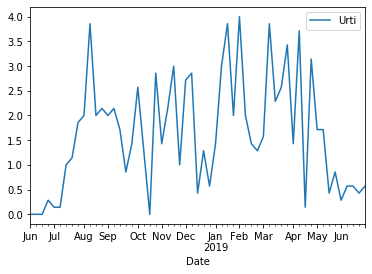

In [77]:
df_urti_weeklyM.plot()

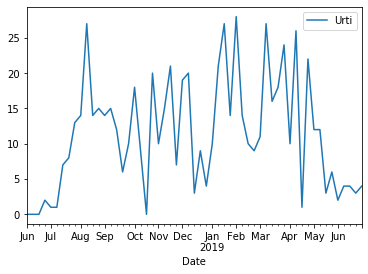

In [78]:
df_urti_weeklyS.plot()

In [79]:
df_diff=df.diff(1)

In [80]:
df_diff=df_diff[1:]

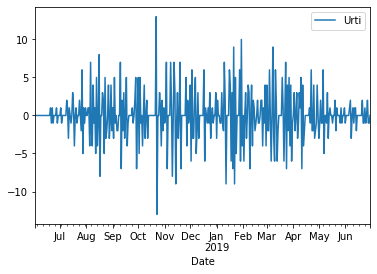

In [81]:
df_diff.plot()

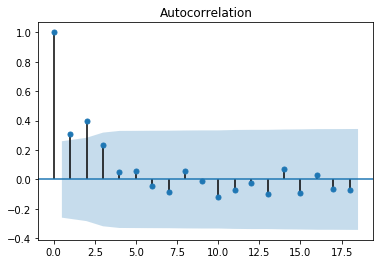

In [399]:
plot_acf(df_urti_weeklyM);

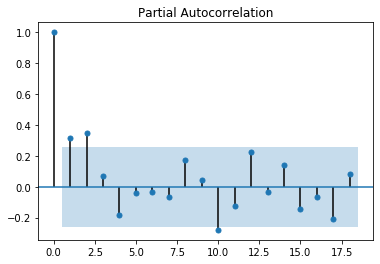

In [398]:
plot_pacf(df_urti_weeklyM);

# AR on weekly data with 1 time differencing

In [509]:
df_weekly=df_urti_weeklyM.diff(1)[1:]

In [510]:
df_weekly.head()

,Urti
Date,
2018-06-10,0.000000
2018-06-17,0.000000
2018-06-24,0.285714
2018-07-01,-0.142857
2018-07-08,0.000000


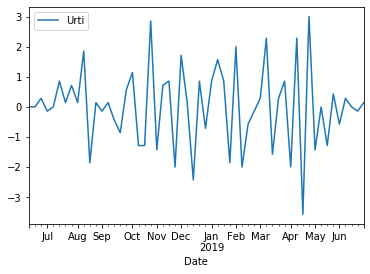

In [511]:
df_weekly.plot()

In [512]:
df_weekly.size

56

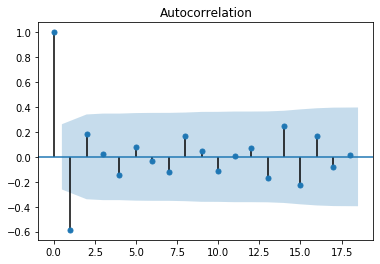

In [513]:
plot_acf(df_weekly);

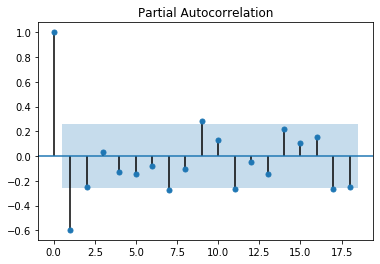

In [514]:
plot_pacf(df_weekly);

In [515]:
total=df_weekly
test_size=int(0.25*total.size)
train_size=total.size-test_size

In [516]:
test_size

14

In [517]:
train_size

42

In [518]:
total.size

56

In [519]:
train=total[:train_size]

In [520]:
test=total[train_size:]

In [521]:
train.size+test.size

56

In [522]:
from statsmodels.tsa.ar_model import AR

In [523]:
model=AR(total)
model_fit=model.fit()

In [524]:
from statsmodels.tsa.arima_model import ARMA

In [549]:
arma_model=ARMA(total,order=(12,2))
arma_model_fit=arma_model.fit()

c:\program files\python36\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
c:\program files\python36\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [550]:
arma_preds=arma_model_fit.predict(start=(train_size),end=total.size)

In [529]:
preds=model_fit.predict(start=(train_size),end=total.size)

In [530]:
preds.size

15

In [531]:
arma_preds.size

15

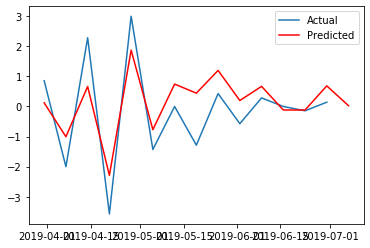

In [532]:
plt.plot(test,label='Actual')
plt.plot(preds,color='red',label='Predicted')
plt.legend()

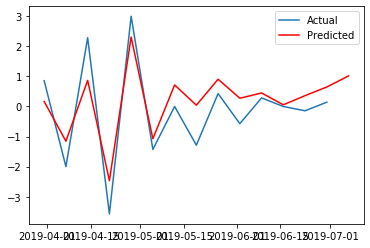

In [551]:
plt.plot(test,label='Actual')
plt.plot(arma_preds,color='red',label='Predicted')
plt.legend()

In [424]:
model_fit.aic

0.46502836759471755

In [425]:
arma_model_fit.aic

173.14478497015637

In [383]:
model.exog_names

['const',
 'L1.Urti',
 'L2.Urti',
 'L3.Urti',
 'L4.Urti',
 'L5.Urti',
 'L6.Urti',
 'L7.Urti',
 'L8.Urti',
 'L9.Urti',
 'L10.Urti',
 'L11.Urti',
 'L12.Urti',
 'L13.Urti',
 'L14.Urti',
 'L15.Urti',
 'L16.Urti',
 'L17.Urti']

In [384]:
model_fit.aic

1.8790039555926863

# ARIMA model

In [385]:
df_arima=df_urti_weeklyM

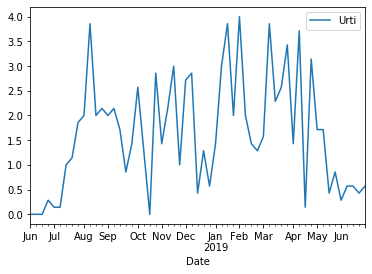

In [386]:
df_arima.plot()

In [387]:
total=df_arima
test_size=int(0.25*total.size)
train_size=total.size-test_size

In [388]:
test_size

14

In [389]:
train_size

43

In [390]:
total.size

57

In [426]:
train=total[:train_size]

In [427]:
test=total[train_size:]

In [428]:
train.size+test.size

57

In [37]:
from statsmodels.tsa.arima_model import ARIMA

In [39]:
model=ARIMA(train,order=(1,1,1))

In [40]:
fit_model=model.fit()

ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

In [452]:
fit_model.aic

127.2735997677336

In [453]:
preds=fit_model.forecast(steps=test_size)[0]

In [454]:
preds.size

14

In [455]:
test.size

14

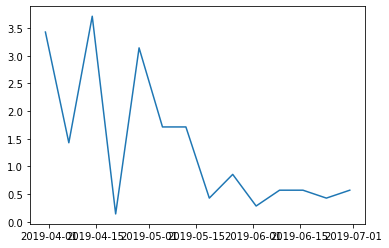

In [456]:
plt.plot(test)

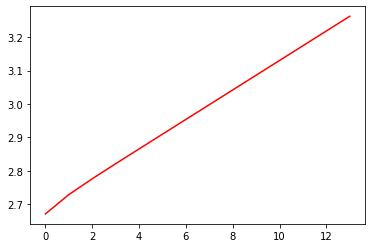

In [457]:
plt.plot(preds,color='red')

In [438]:
p=d=q=range(5)
import itertools

In [439]:
params=list(itertools.product(p,d,q))

In [442]:
len(params)

125

In [447]:
min_param=()
min_aic=300
import warnings as wngs
wngs.filterwarnings('ignore')
for par in params:
    try:
        model=ARIMA(train,order=(par[0],par[1],par[2]))
        model_fit=model.fit()
        aic=model_fit.aic
        if aic!=None and aic<min_aic:
            min_aic=aic
            min_param=par
    except:
        continue

In [448]:
min_param

(1, 1, 1)

In [449]:
min_aic

127.2735997677336